In [1]:
import pandas as pd
import os

In [2]:
telco = pd.read_csv('data/Churn.csv')
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [3]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

- The **`.groupby()`** method is incredibly useful when we want to investigate specific columns of our dataset. Here, we're going to explore the 'Churn' column further to see if there are differences between churners and non-churners.

In [4]:
telco.groupby(['Churn']).std()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,39.88235,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
yes,39.46782,11.860138,68.997792,51.728910,47.132825,2.793190,1.853275,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270


- Perhaps unsurprisingly, churners seem to make more customer service calls than non-churners.    

### Churn by State
- When dealing with customer data, geographic regions may play an important part in determining whether a customer will cancel their service or not. We may have noticed that there is a 'State' column in the dataset. We'll group 'State' and 'Churn' to count the number of churners and non-churners by state. For example, if we wanted to group by x and aggregate by y, we could use .groupby() as follows:

```python
df.groupby('x')['y'].value_counts()
```

- **Task** : Group telco by 'State', aggregate by 'Churn', and then use value_counts() to count the number of churners and non-churners by state.

In [5]:
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
       yes      11
AZ     no       60
       yes       4
CA     no       25
       yes       9
CO     no       57
       yes       9
CT     no       62
       yes      12
DC     no       49
       yes       5
DE     no       52
       yes       9
FL     no       55
       yes       8
GA     no       46
       yes       8
HI     no       50
       yes       3
IA     no       41
       yes       3
ID     no       64
       yes       9
IL     no       53
       yes       5
                ..
OK     no       52
       yes       9
OR     no       67
       yes      11
PA     no       37
       yes       8
RI     no       59
       yes       6
SC     no       46
       yes      14
SD     no       52
       yes       8
TN     no       48
       yes       5
TX     no       54
       yes      18
UT     no       62
       yes      10
VA     no       72
       yes       5
VT     no       65

- While California is the most populous state in the U.S, there are not as many customers from California in our dataset. Arizona (AZ), for example, has 64 customers, 4 of whom ended up churning. In comparison, California has a higher number (and percentage) of customers who churned. This is useful information for a company!

### Exploring feature distributions
- `'Account_Length'` feature was normally distributed. Let's now visualize the distributions of the following features using seaborn's distribution plot:
`'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins'`


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

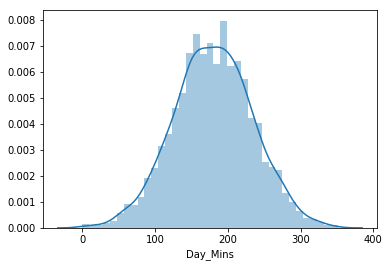

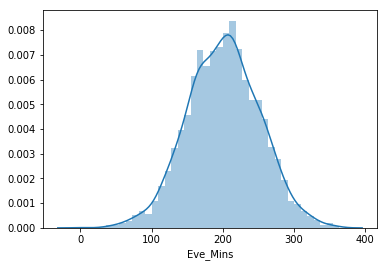

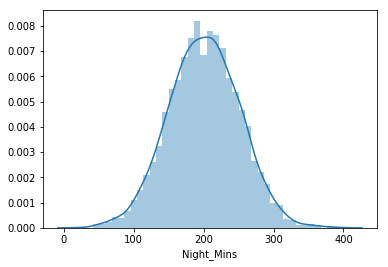

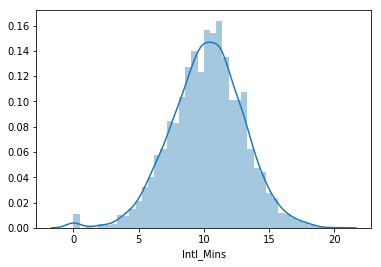

In [7]:
features = ['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins']
for feature in features:
    sns.distplot(telco[feature])
    plt.show()

#### Observation : All of these features appear to be well approximated by the normal distribution. If this was not the case, we would have to consider applying a feature transformation of some kind.

### Customer service calls and churn
- There's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners. 
- Let's now visualize this difference using a box plot and incorporate other features of interest - do customers who have international plans make more customer service calls? Or do they tend to churn more? How about voicemail plans? 

```python
# syntax for seaborn boxplot
sns.boxplot(x = "X-axis variable",
            y = "Y-axis variable",
            data = DataFrame)
```

- If we want to remove outliers, we can specify the additional parameter `sym=""`, and we can add a third variable using hue.
- **Task** : Create a box plot with `'Churn'` on the x-axis and `'CustServ_Calls'` on the y-axis.

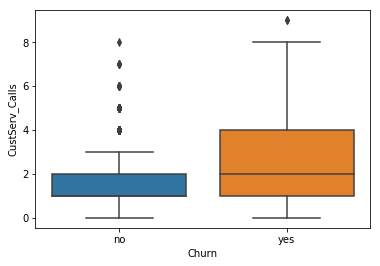

In [8]:
# Create the box plot
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          data = telco)

# Display the plot
plt.show()

- There is a very noticeable difference here between churners and non-churners! Now, remove the outliers from the box plot.

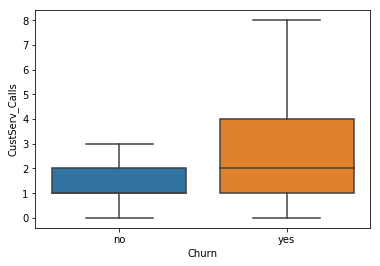

In [9]:
# reomving outliers
# Create the box plot
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          data = telco,
           sym="")

# Display the plot
plt.show()

- Add a third variable to this plot - `'Vmail_Plan'` - to visualize whether or not having a voice mail plan affects the number of customer service calls or churn.

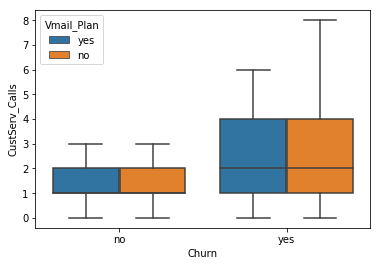

In [10]:
# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan")

# Display the plot
plt.show()

- Not much of a difference there. Update code so that the third variable is 'Intl_Plan' instead.

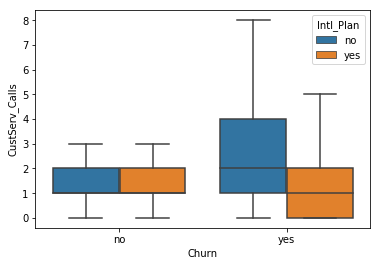

In [11]:
# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")

# Display the plot
plt.show()

- There are some very interesting insights here. It looks like **customers who do churn end up leaving more customer service calls**, unless these customers also have an international plan, in which case they leave fewer customer service calls. This type of information is really useful in better understanding the drivers of churn. 

### Identifying features to convert
- **Task** :  explore the different data types of telco and identify the ones that are of type object.
- it is preferable to have features like `'Churn'` encoded as 0 and 1 instead of no and yes, so that we can then feed it into machine learning algorithms that only accept numeric values.

In [12]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


- `Churn, Vmail_Plan, and Intl_Plan`, in particular, are binary features that can easily be converted into 0s and 1s. 

### Encoding binary features
- assign the values 1 to 'yes' and 0 to 'no' to the 'Vmail_Plan' and 'Churn' features
- There are two approaches to doing this - one using `pandas`, and the other using `scikit-learn`. For straightforward tasks like this, sticking with pandas is recommended
- to build machine learning pipelines, on the other hand - we can explore using LabelEncoder()

In [13]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0, 'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no':0, 'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Intl_Plan'
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0, 'yes':1})

# Print the results to verify
print(telco['Vmail_Plan'].head())

print(telco['Churn'].head())

print(telco['Intl_Plan'].head())


0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64
0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64


- With these features encoded as 0 and 1, you can now use them in machine learning algorithms.

### One hot encoding
- 'State' feature can be encoded numerically using the technique of one hot encoding
- Doing this manually would be quite tedious, especially when we have 50 states and over 3000 customers! Fortunately, pandas has a **`get_dummies()`** function which automatically applies one hot encoding over the selected feature.


In [14]:
# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])
telco_state.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Notice that this creates an entirely new DataFrame. Once we merge this back into the original telco DataFrame, we can begin using these state features in your models. Do note, however, that we now have many more features in our dataset, so we should consider dropping any that are unnecessary.

### Feature scaling
- 'Intl_Calls' and 'Night_Mins' features are at different scales
- **Task** :  re-scale them using StandardScaler

In [15]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# create a subset of 'Intl_Calls' and 'Night_Mins' features
telco_subset = telco[['Intl_Calls', 'Night_Mins']]

# Scale telco using StandardScaler
telco_scaled = StandardScaler().fit_transform(telco_subset)

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

# Print summary statistics
print(telco_scaled_df.describe())

         Intl_Calls    Night_Mins
count  3.333000e+03  3.333000e+03
mean  -1.264615e-16  6.602046e-17
std    1.000150e+00  1.000150e+00
min   -1.820289e+00 -3.513648e+00
25%   -6.011951e-01 -6.698545e-01
50%   -1.948306e-01  6.485803e-03
75%    6.178983e-01  6.808485e-01
max    6.307001e+00  3.839081e+00


- Both features are now on the same scale.

### Dropping unnecessary features
- Some features such as `'Area_Code'` and `'Phone'` are not useful when it comes to predicting customer churn, and they need to be dropped prior to modeling. The easiest way to do so in Python is using the .drop() method of pandas DataFrames
- **Task** : Drop `Area_Code` and `Phone`

In [16]:
# Drop the unnecessary features
telco = telco.drop(telco[['Area_Code','Phone']], axis=1)

# Verify dropped features
print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')


#### Why don't we use unique identifiers such as phone numbers in our churn model? They don't provide any predictive power.

### Engineering a new column
- Leveraging domain knowledge to engineer new features is an essential part of modeling. This quote from Andrew Ng summarizes the importance of feature engineering: `Coming up with features is difficult, time-consuming, requires expert knowledge. `"Applied machine learning"` is basically feature engineering.`
- **Task** : Create a new feature - `'Avg_Night_Calls'` - that is the result of **dividing `'Night_Mins by 'Night_Calls'`**.

In [17]:
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']

# Print the first five rows of 'Avg_Night_Calls'
print(telco['Avg_Night_Calls'].head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


#### Leveraging your domain knowledge is crucial in churn modeling.

In [222]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Avg_Night_Calls
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,2.689011
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,2.469903
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,1.563462
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,2.212360
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,1.544628


### Merge the state enoded values in the original dataset

In [231]:
states = telco['State']
for row in states:
    telco['State'] = telco['State'].replace({row:telco_state_transpose.loc[row]})
# telco_state_transpose = telco_state.T
# telco['State'] = telco['State'].map(telco_state_transpose)

# states = telco_state.values
# telco = telco.drop('State', axis=1)
# for state in states:
#     telco['State'] = state
# telco.head()
# telco['State'].replace(telco_state_transpose)
telco_state_transpose.loc["AR"]

ValueError: Replacement not allowed with overlapping keys and values

### Final Feature scaling

In [92]:
# Scale telco using StandardScaler
telco_scaled = StandardScaler().fit_transform(telco)

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=telco.columns)

telco_scaled_df.head()

ValueError: could not convert string to float: 'KS'

In [85]:
## unseen data point

cols = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']
vals = [ 91.  ,  23.  , 232.4 , 186.  , 190.5 ,  12.3 ,   3.  ,   0.  ,
          1.  ,  97.  ,  39.51,  88.  ,  15.81, 128.  ,   8.57,   3.  ,
          3.32]

new_customer_dict = {}
for col,val in zip(cols,vals):
    new_customer_dict[col] = val

# print(new_customer_dict)
new_customer = pd.DataFrame(new_customer_dict, index=[0])
new_customer.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,91.0,23.0,232.4,186.0,190.5,12.3,3.0,0.0,1.0,97.0,39.51,88.0,15.81,128.0,8.57,3.0,3.32


### Predicting whether a new customer will churn
- **Task** : Instantiate LogisticRegression(), storing the result in clf (short for classifier).

In [87]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[cols], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'yes'

In [88]:
telco[cols].head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,no,yes,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,no,yes,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,no,no,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,yes,no,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,yes,no,113,28.34,122,12.61,121,8.41,3,2.73
